# 08CaseCOVID19V2

# Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

# Loading Data

In [2]:
case = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\\case.csv",
    index_col=False,
    skipinitialspace=True,
)

# Display Data

In [3]:
pd.set_option("max_rows", None)

# Size

In [4]:
case.shape

(174, 8)

# Missing Data

In [5]:
case.isna().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

# Delete Unneeded Columns

In [6]:
case = case.drop(["case_id", "city", "group", "latitude", "longitude"], axis=1)

# Delete Unneeded Row

In [7]:
case = case[case.infection_case != 'etc']

# Rename Columns

In [8]:
case.rename(
    columns={
        "province": "Province",
        "infection_case": "Infection Reason",
        "confirmed": "Confirmed",
    },
    inplace=True,
)

# Rename Column Values

In [9]:
case.replace('contact with patient', 'Contact with Patient', inplace=True)
case.replace('overseas inflow', 'Overseas Inflow', inplace=True)
case.replace('gym facility in Cheonan', 'Gym Facility in Cheonan', inplace=True)
case.replace('Door-to-door sales in Daejeon', 'Door-to-Door Sales in Daejeon', inplace=True)
case.replace('gym facility in Cheonan', 'Gym Facility in Cheonan', inplace=True)
case.replace('Geumcheon-gu rice milling machine manufacture', 'Geumcheon-gu Rice Milling Machine Manufacture', inplace=True)
case.replace('Lotte Confectionery logistics center', 'Lotte Confectionery Logistics Center', inplace=True)
case.replace('gym facility in Sejong', 'Gym Facility in Sejong', inplace=True)
case.replace('Seoul City Hall Station safety worker', 'Seoul City Hall Station Safety Worker', inplace=True)
case.replace('Gangnam Yeoksam-dong gathering', 'Gangnam Yeoksam-dong Gathering', inplace=True)
case.replace('Seongnam neighbors gathering', 'Seongnam neighbors Gathering', inplace=True)
case.replace('Eunpyeong-Boksagol culture center', 'Eunpyeong-Boksagol Culture Center', inplace=True)
case.replace('Biblical Language study meeting', 'Biblical Language Study Meeting', inplace=True)
case.replace('Daejeon door-to-door sales', 'Daejeon Door-to-Door Sales', inplace=True)

# Dataset

In [10]:
pd.set_option("max_rows", None)

In [11]:
case.head()

,Province,Infection Reason,Confirmed
0,Seoul,Itaewon Clubs,139
1,Seoul,Richway,119
2,Seoul,Guro-gu Call Center,95
3,Seoul,Yangcheon Table Tennis Club,43
4,Seoul,Day Care Center,43


# Total Cases

In [12]:
pivot_infection = pd.pivot_table(
    data=case, index=["Infection Reason"], values="Confirmed", aggfunc = 'sum').sort_values('Confirmed', ascending = False)

In [13]:
total = pivot_infection['Confirmed'].sum()

# Shincheonji Church

In [14]:
shincheonji_church = pivot_infection.loc['Shincheonji Church']
shincheonji_church = shincheonji_church['Confirmed']

In [15]:
other_overall = total - shincheonji_church 

In [16]:
# plt.figure(figsize=(8, 8))
sns.set_context("paper", font_scale=2.0)
ord_color = "bisque"
spec_lev1 = "red"

# plt.title("Confirmed Cases in South Korea", fontsize=18, y=1)

data = [shincheonji_church, other_overall]
labels = ['Shincheonji Church', 'Other Infection Reasons']
colors = [spec_lev1, ord_color]

# Shincheonji Church Confirmed Cases in Daegu Province

In [17]:
pivot_province = pd.pivot_table(
    data=case, index=["Province"], values="Confirmed", aggfunc = 'sum').sort_values('Confirmed', ascending = False)

In [18]:
daegu = pivot_province.loc['Daegu']
daegu = daegu ['Confirmed']

In [19]:
shincheonji_church_daegu = case.loc[
    (case["Province"] == "Daegu") & (case["Infection Reason"] == "Shincheonji Church")
]

shincheonji_church_daegu = shincheonji_church_daegu.set_index('Infection Reason')
shincheonji_church_daegu = shincheonji_church_daegu.loc['Shincheonji Church']
shincheonji_church_daegu = shincheonji_church_daegu['Confirmed']

In [20]:
other_daegu = daegu - shincheonji_church_daegu

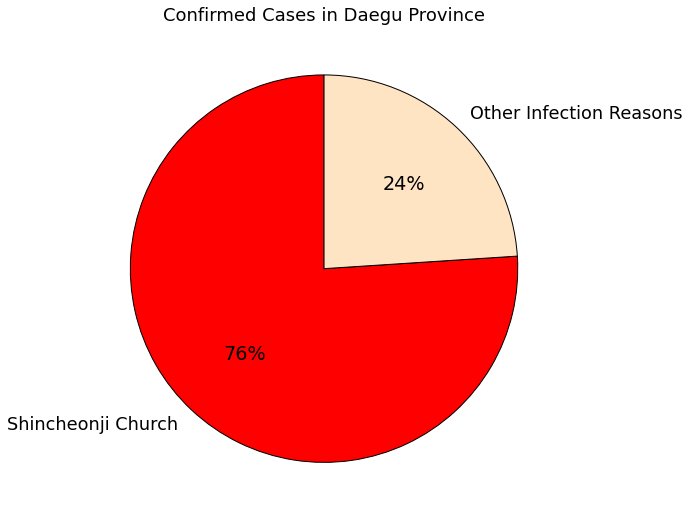

In [38]:
plt.figure(figsize=(8, 8))

plt.title("Confirmed Cases in Daegu Province", fontsize=18, y=1)

sns.set_context("paper", font_scale=2.0)

ord_color = "bisque"
spec_lev1 = "red"

data = [shincheonji_church_daegu, other_daegu]
labels = ["Shincheonji Church", "Other Infection Reasons"]
colors = [spec_lev1, ord_color]

plt.tight_layout()
plt.pie(
    data,
    labels=labels,
    colors=colors,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1},
);

# Daegu Confirmed Cases

In [22]:
pivot_province = pd.pivot_table(
    data=case, index=["Province"], values="Confirmed", aggfunc = 'sum').sort_values('Confirmed', ascending = False)

In [23]:
daegu = pivot_province.loc['Daegu']
daegu = daegu ['Confirmed']
daegu

5933

In [24]:
other_provinces = total - daegu
other_provinces

4270

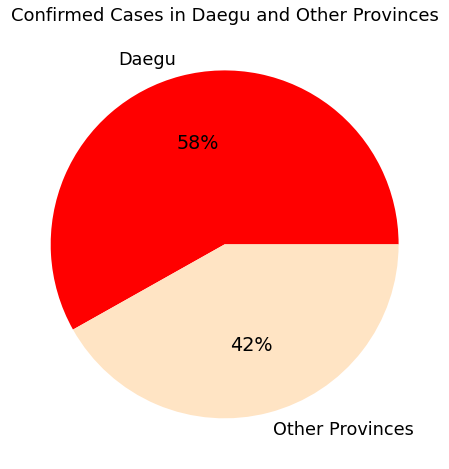

In [25]:
plt.figure(figsize=(8, 8))

plt.title("Confirmed Cases in Daegu and Other Provinces", fontsize=18, y=1)

sns.set_context("paper", font_scale=2.0)

ord_color = "bisque"
spec_lev1 = "red"

data = [daegu, other_provinces]
labels = ['Daegu', 'Other Provinces']
colors = [spec_lev1, ord_color]

plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%');

# Grid

TypeError: pie() got an unexpected keyword argument 'ax'

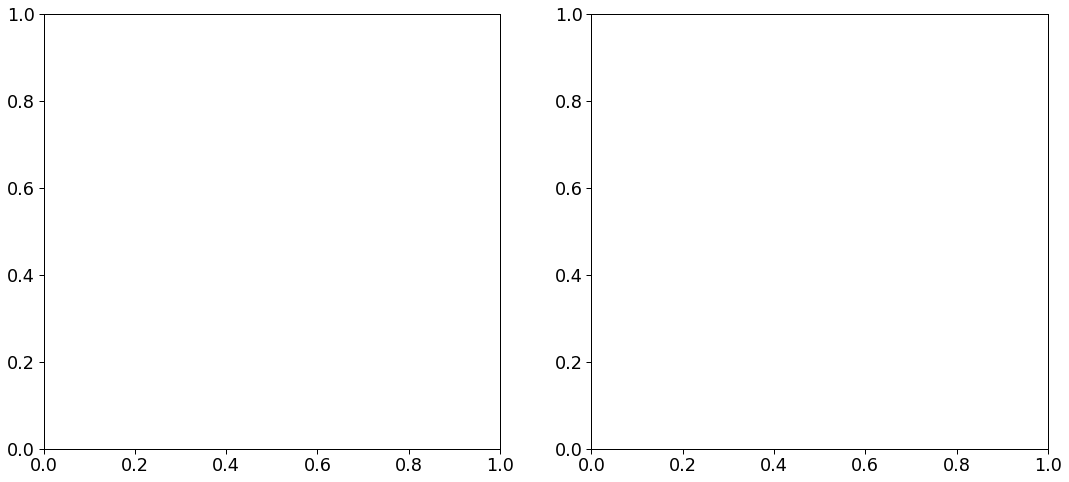

In [30]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig_1 = plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', ax=my_grid[0])
fig_1.set_title("Confirmed Cases in South Korea");

AttributeError: 'tuple' object has no attribute 'set_title'

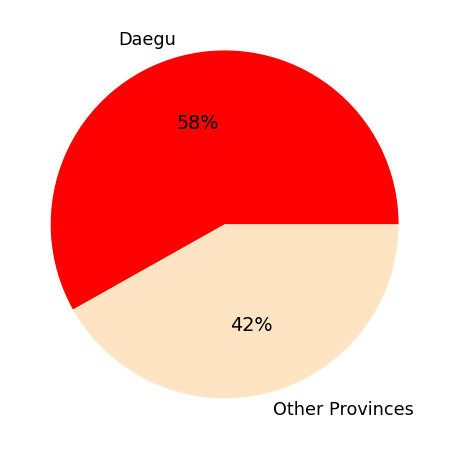

In [28]:
plt.figure(figsize=(8, 8))

fig_1 = plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', ax=my_grid[0])
fig_1.set_title("Confirmed Cases in South Korea");

<Figure size 432x288 with 0 Axes>

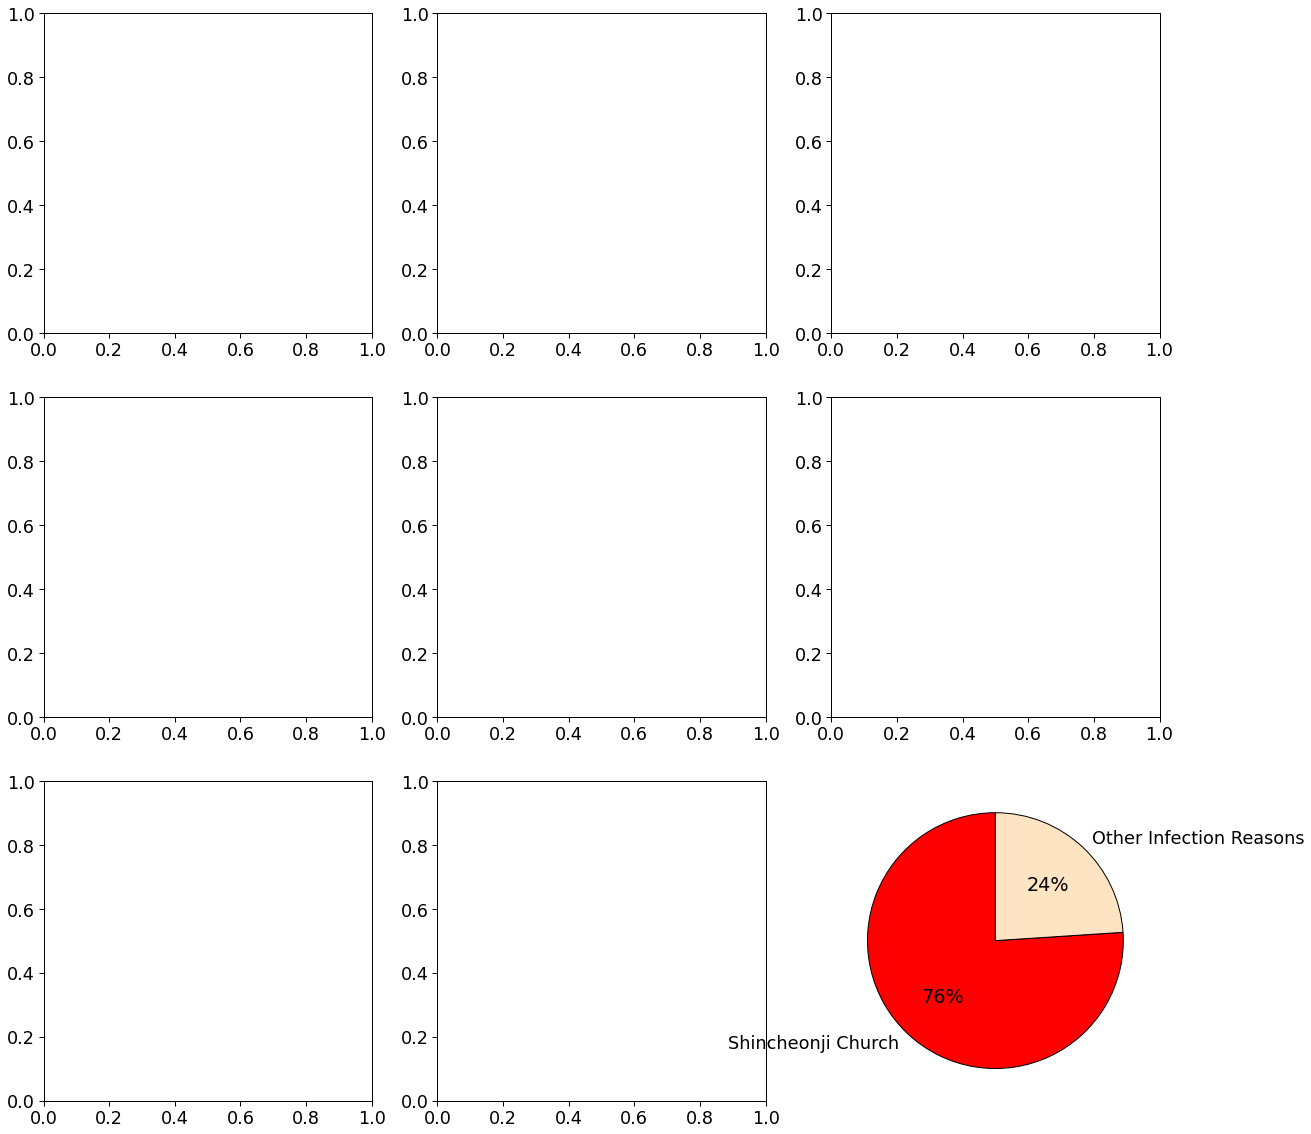

In [54]:
# plt.figure(figsize=(8, 8))

# plt.title("Confirmed Cases in Daegu Province", fontsize=18, y=1)

sns.set_context("paper", font_scale=2.0)

ord_color = "bisque"
spec_lev1 = "red"

data = [shincheonji_church_daegu, other_daegu]
labels = ["Shincheonji Church", "Other Infection Reasons"]
colors = [spec_lev1, ord_color]
plt.tight_layout()

fig, axes = plt.subplots(3, 3, figsize=(20, 20))

plt.pie(
    data,
    labels=labels,
    colors=colors,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1}
)

plt.show();